# Seminario MODFLOW 6
## Discretización del tiempo

Autor: Luis M. de la Cruz Salas. Instituto de Geofísica, UNAM
Revisión: mar ago  4 14:28:44 CDT 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [6]:
def calcTDIS(PERLEN, NSTP, TSMULT, graf=False):
  """ Esta función calcula el paso de tiempo para una simulación en MODFLOW 6

  Parameters
  ----------
  PERLEN: float
  Tamaño del periodo de estrés.

  NSTP: int
  Número de pasos de tiempo.

  TSMULT: float
  Factor de multiplicación: paso de tiempo actual / paso de tiempo anterior.

  Returns
  -------
  Lista de pasos de tiempo y coordenadas de cada paso.
  """
  if TSMULT == 1:
    Dt1 = PERLEN / NSTP
  else:
    Dt1 = PERLEN * (TSMULT - 1) / (TSMULT**NSTP - 1)

  time_coord = [0]
  time_steps = [Dt1]
  i = 0
  while True:
    if time_coord[i] < PERLEN:
      time_coord.append(time_coord[i] + time_steps[i])
      time_steps.append(time_steps[i] * TSMULT)
      i += 1
    else:
      break

  time_steps.pop()

  offset = time_coord[-1] * 0.1
  if graf:
    y = np.ones(len(time_coord))
    plt.plot(time_coord,y,'|-')
    plt.xticks(ticks=time_coord, rotation=45, fontsize=8)
    plt.xlim(0 - offset, time_coord[-1] + offset)
    plt.xlabel('time step')
    plt.show()

  return time_steps, time_coord

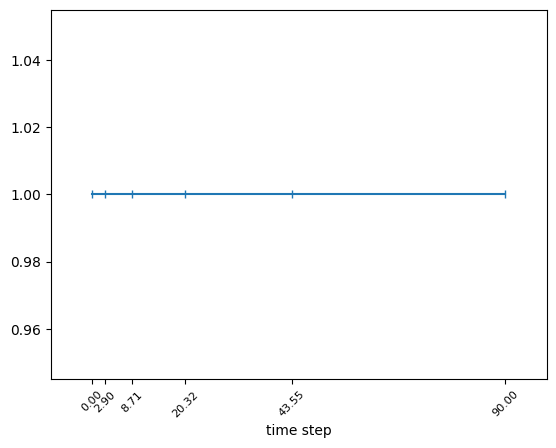

[2.903225806451613, 5.806451612903226, 11.612903225806452, 23.225806451612904, 46.45161290322581]
[0, 2.903225806451613, 8.70967741935484, 20.322580645161292, 43.54838709677419, 90.0]


In [7]:
PERLEN = 90.0
NSTP = 5
TSMULT = 2.0

ts, pl = calcTDIS(PERLEN, NSTP, TSMULT, graf=True)
print(ts, pl, sep='\n')

In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [9]:
w = interact(calcTDIS,
             PERLEN = widgets.FloatSlider(min=10, max=90, step=10, value=30),
             NSTP = widgets.IntSlider(min=1, max=6, step=1, value=3),
             TSMULT = widgets.FloatSlider(min=1, max=5, step=1, value=2))

interactive(children=(FloatSlider(value=30.0, description='PERLEN', max=90.0, min=10.0, step=10.0), IntSlider(…

# Ejemplo TWRI
## Pozos

Autor: Luis M. de la Cruz Salas. Instituto de Geofísica, UNAM
Revisión: mar ago 25 12:33:55 CDT 2020

In [ ]:
Lx = 75000
Ly = 75000
ztop = 200
zbot = -450
Lz = ztop - zbot

nx = 15
ny = 15
nz = 5

print(Lx, Ly, Lz)

75000 75000 650


In [ ]:
wells = [ (3,5,11)]
2,4,6
1,6,12
1,9,8
1,9,10
1,9,12
1,9,14
1,11,8
1,11,10
1,11,12
1,11,14
1,13,8
1,13,10
1,13,12
1,13,14




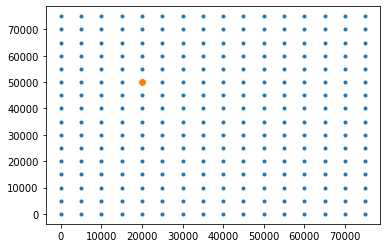

In [ ]:
x = np.linspace(0, Lx, 16)
y = np.linspace(0, Ly, 16)
z = np.array([200, -150, -200, -300, -350, -450])
xg, yg = np.meshgrid(x,y)

plt.scatter(xg,yg, marker='.')
plt.scatter(x[4], y[10])

In [ ]:
print(type(xg))
print(xg[0][0])

<class 'numpy.ndarray'>
0.0


In [ ]:
wells = [ [3,5,11]]
print(xg[5][11])
print(xg[5][11])

55000.0


In [ ]:
plt.